In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

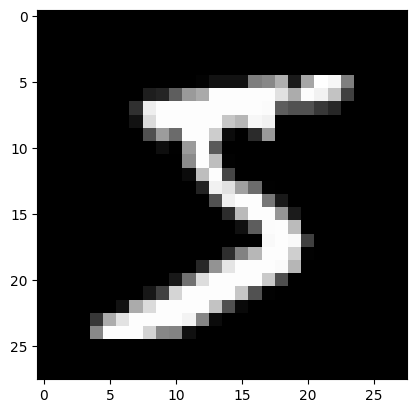

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

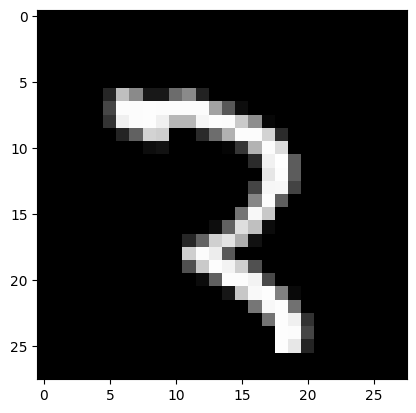

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:

model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 26s 51ms/step - loss: 0.3039 - accuracy: 0.9094 - val_loss: 0.1065 - val_accuracy: 0.9678
Epoch 2/8
469/469 [==============================] - 22s 46ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.0636 - val_accuracy: 0.9791
Epoch 3/8
469/469 [==============================] - 22s 48ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0596 - val_accuracy: 0.9793
Epoch 4/8
469/469 [==============================] - 27s 57ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0519 - val_accuracy: 0.9824
Epoch 5/8
469/469 [==============================] - 22s 47ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0440 - val_accuracy: 0.9837
Epoch 6/8
469/469 [==============================] - 21s 45ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0430 - val_accuracy: 0.9849
Epoch 7/8
469/469 [==============================] - 24s 50ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0413 - val_accuracy: 0.9859

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.303932,0.909367,0.106455,0.9678
1,0.085567,0.975050,0.063599,0.9791
2,0.058853,0.982650,0.059579,0.9793
3,0.045738,0.986317,0.051850,0.9824
4,0.036971,0.988867,0.044030,0.9837


<Axes: >

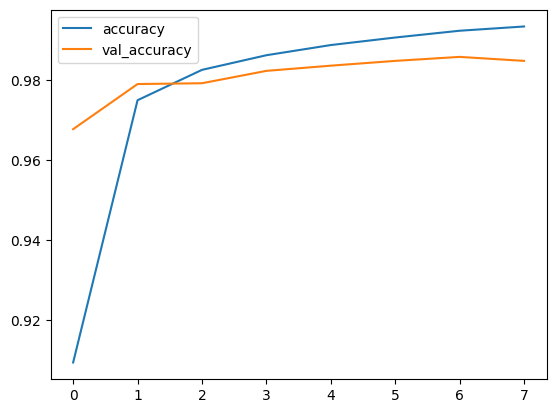

In [ ]:
metrics[['accuracy','val_accuracy']].plot()



<Axes: >

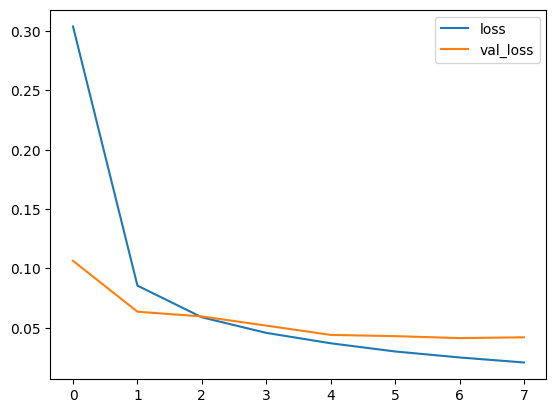

In [ ]:
metrics[['loss','val_loss']].plot()



In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)



313/313 [==============================] - 2s 5ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))



[[ 975    0    0    1    0    0    4    0    0    0]
 [   0 1129    0    0    0    0    3    0    3    0]
 [   2    2 1020    0    2    0    2    2    2    0]
 [   0    0    4  994    0    5    0    3    4    0]
 [   0    0    3    0  967    0    3    0    2    7]
 [   1    0    1    6    0  873    8    0    3    0]
 [   3    3    0    0    2    3  945    0    2    0]
 [   0    2   16    1    0    1    0 1001    3    4]
 [   2    0    1    0    0    0    0    1  969    1]
 [   1    0    1    5    7    7    0    4    8  976]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('2 img.png')
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('/content/2 img.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 37ms/step


In [ ]:
print(x_single_prediction)

[2]


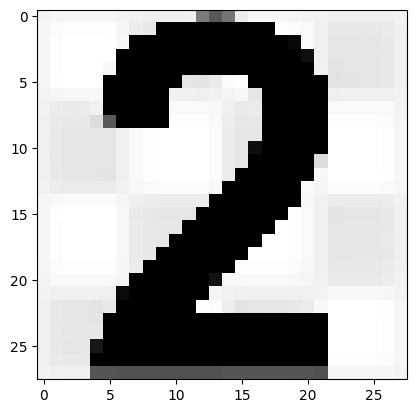

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
print(x_single_prediction)

[2]
